<a href="https://colab.research.google.com/github/erivelton-jr/superstore-sales-analysis/blob/main/superstore_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🎯 Objetivo do Projeto
Neste projeto, realizamos uma análise exploratória e descritiva de um conjunto de dados de uma rede varejista que comercializa produtos em diversas cidades dos Estados Unidos. O objetivo principal é responder a perguntas de negócio relevantes para tomada de decisão, utilizando as seguintes ferramentas:

* Python🐍
* Matplotlib & Seaborn 📊
* Pandas 🐼
* Datetime ⏳
* Numpy 🔢
---

### Carregando dos dados

In [215]:
#Instalando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

In [2]:
#Carregando os dados

url = "https://github.com/erivelton-jr/superstore-sales-analysis/raw/refs/heads/main/Sample%20-%20Superstore.xls"

df = pd.read_excel(url)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Análise exploratoria

Agora com os dados carregados, iremos verificar se há necessidade de fazer o tratamento e transformação dos dados.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [4]:
#visualizando forma da tabela
df.shape

(9994, 21)

In [5]:
#Verificando os nomes das colunas
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
df['Sales'].describe()

,Sales
count,9994.000000
mean,229.858001
std,623.245101
min,0.444000
25%,17.280000
50%,54.490000
75%,209.940000
max,22638.480000


In [7]:
#verificando se há dados duplicados
df[df.duplicated]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


Os dados estão de acordo:

<div>✅ Não possui dados nulos. </div>
<div>✅ Tipo de dados corretos. </div>
<div>✅ Não há dados faltantes. </div>

# ❓ Perguntas de Negócio

### 📌 1. Qual a Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [8]:
maior_valor_venda = df[df['Category'] == 'Office Supplies'].groupby('City')['Profit'].sum().sort_values(ascending=False)

In [9]:
maior_valor_venda

,Profit
City,
New York City,20624.7864
Los Angeles,13460.6287
Seattle,9915.4303
San Francisco,9621.2494
Detroit,7884.6422
...,...
Dallas,-1504.6771
Philadelphia,-3867.5058
San Antonio,-5689.9195


In [10]:
print("A cidade com o maior numero de venda foi:", maior_valor_venda.idxmax())

A cidade com o maior numero de venda foi: New York City


### 📊 2. Qual o Total de Vendas Por Data do Pedido?

In [11]:
vendas_por_data = df.groupby('Order Date')['Sales'].sum()

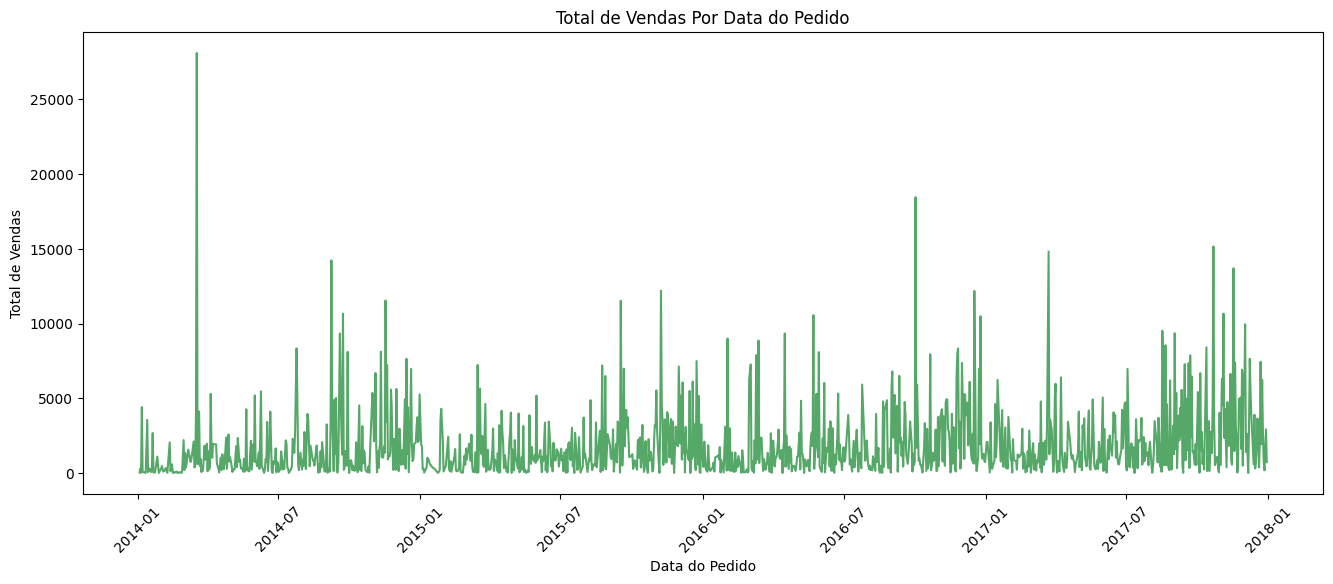

In [12]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.set_style('whitegrid')

sns.set_color_codes("deep")
plt.plot(vendas_por_data.index, vendas_por_data.values, color='g')

ax.set_xlabel('Data do Pedido')
ax.set_ylabel('Total de Vendas')
ax.set_title('Total de Vendas Por Data do Pedido')

plt.xticks(rotation=45)
plt.show()

### 📍 3. Qual o Total de Vendas por Estado?

In [13]:
vendas_por_uf = df.groupby('State')['Sales'].sum()
vendas_por_uf

,Sales
State,
Alabama,19510.6400
Arizona,35282.0010
Arkansas,11678.1300
California,457687.6315
Colorado,32108.1180
Connecticut,13384.3570
Delaware,27451.0690
District of Columbia,2865.0200
Florida,89473.7080


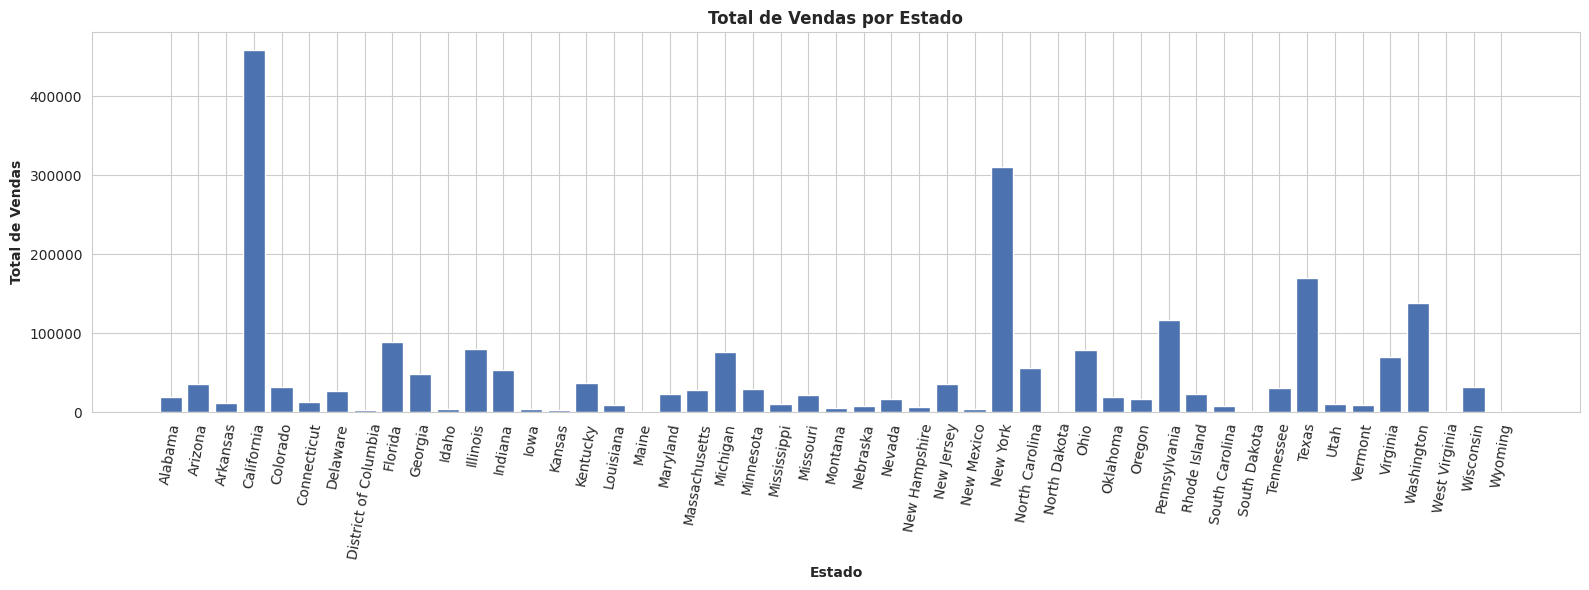

In [14]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.set_style('whitegrid')


sns.set_color_codes("deep")
plt.bar(vendas_por_uf.index, vendas_por_uf.values, color='b')

ax.set_xlabel('Estado').set_fontweight('bold')
ax.set_ylabel('Total de Vendas').set_fontweight('bold')
ax.set_title('Total de Vendas por Estado').set_fontweight('bold')

plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

### 🏙️ 4. Quais São as 10 Cidades com Maior Total de Vendas?

In [15]:
vendas_por_mun = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)
vendas_por_mun

,Sales
City,
New York City,256368.1610
Los Angeles,175851.3410
Seattle,119540.7420
San Francisco,112669.0920
Philadelphia,109077.0130
Houston,64504.7604
Chicago,48539.5410
San Diego,47521.0290
Jacksonville,44713.1830


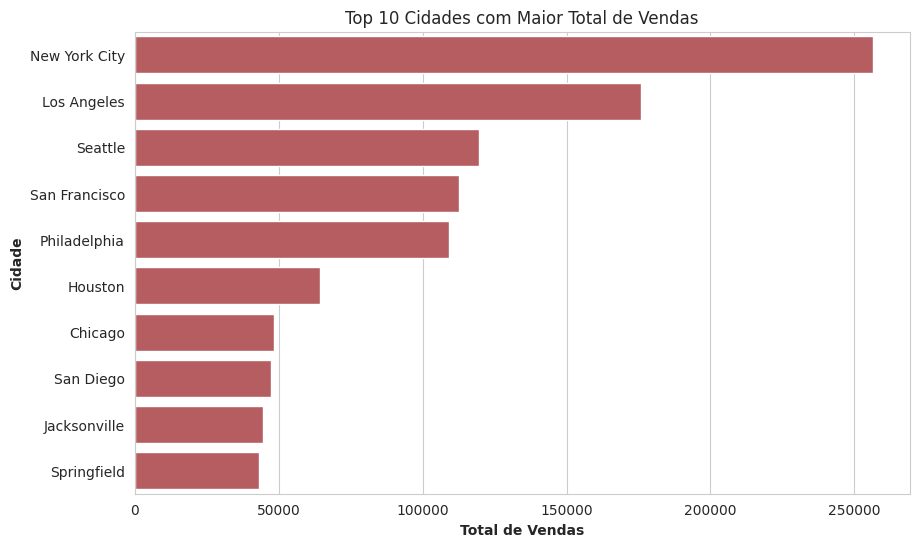

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.set_style('whitegrid')

sns.set_color_codes("deep")
sns.barplot(x=vendas_por_mun.values, y=vendas_por_mun.index,
            color='r', orient='h').set_title('Top 10 Cidades com Maior Total de Vendas')

ax.set_xlabel('Total de Vendas').set_fontweight('bold')
ax.set_ylabel('Cidade').set_fontweight('bold')

### 🧑‍💼 5. Qual Segmento Teve o Maior Total de Vendas?

In [17]:
vendas_por_segmento = df.groupby('Segment')['Sales'].sum()

In [18]:
vendas_por_segmento.values

array([1161401.345 ,  706146.3668,  429653.1485])

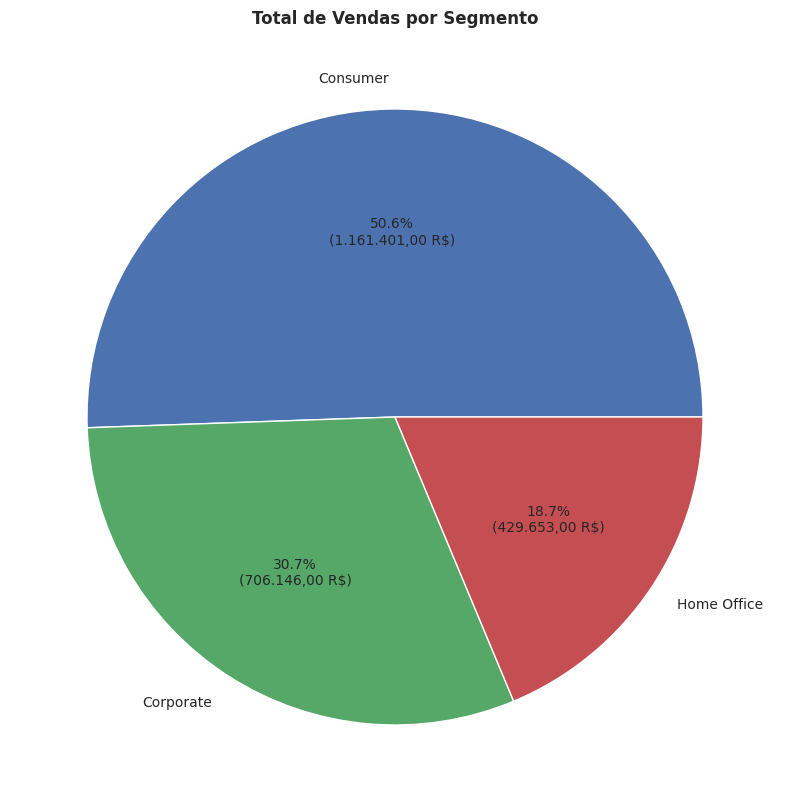

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.color_palette('deep')


#Criando função para mostrar porcentagem e valor
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    formatted_value = "{:,.2f}".format(absolute).replace(",", "X").replace(".", ",").replace("X", ".")
    return f"{pct:.1f}%\n({formatted_value} R$)"

ax.pie(vendas_por_segmento.values,
       labels=vendas_por_segmento.index,
       autopct=lambda pct: func(pct, vendas_por_segmento.values),
       colors=['b', 'g', 'r'])

ax.set_title('Total de Vendas por Segmento').set_fontweight('bold')
plt.show()

### 📅 6. Qual o Total de Vendas Por Segmento e Por Ano?

In [146]:
#Criando coluna
df['year'] = df['Ship Date'].dt.year

vendas_por_ano_segmento = df.groupby(['year', 'Segment'])['Sales'].sum()

In [99]:
vendas_por_ano_segmento

year  Segment    
2014  Consumer       263436.4766
      Corporate      120263.0307
      Home Office     86683.6858
2015  Consumer       265223.0893
      Corporate      135960.6899
      Home Office     78258.7228
2016  Consumer       299009.2432
      Corporate      207068.5008
      Home Office    105248.0090
2017  Consumer       330095.9991
      Corporate      241633.4494
      Home Office    159160.2669
2018  Consumer         3636.5368
      Corporate        1220.6960
      Home Office       302.4640
Name: Sales, dtype: float64

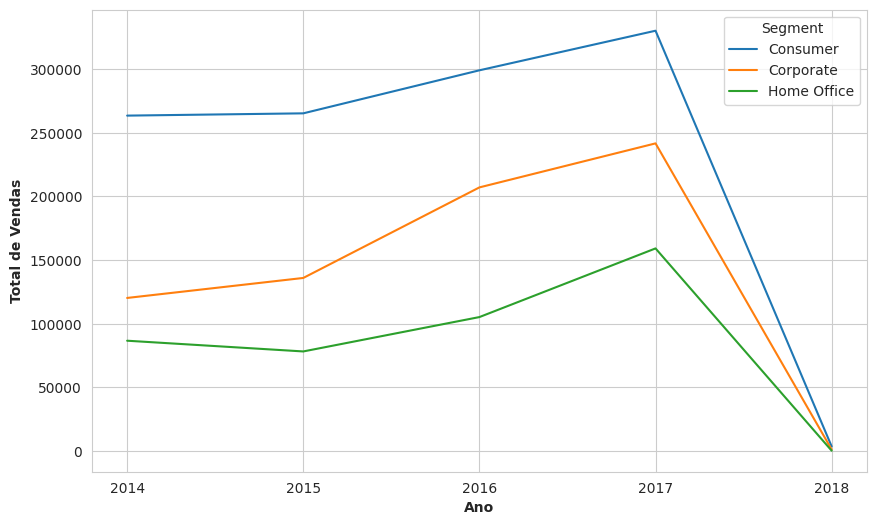

In [100]:
#Criando gráfico
fig, ax = plt.subplots(figsize=(10, 6))

sns.set_style('whitegrid')
sns.set_color_codes("deep")

ax = sns.lineplot(x=vendas_por_ano_segmento.index.get_level_values('year').astype(str),
                  y=vendas_por_ano_segmento.values,
             hue=vendas_por_ano_segmento.index.get_level_values('Segment'),
             markers=True)

ax.set_xlabel('Ano').set_fontweight('bold')
ax.set_ylabel('Total de Vendas').set_fontweight('bold')

### 🧮 7. Quantas Vendas Receberiam 15% de Desconto?

**Objetivo**: Descobrir quantas vendas com valor maior que 1000 receberia 15% de desconto.

In [23]:
desconto_15 = df.loc[df['Sales'] > 1000, 'Sales'].count()

In [24]:
print(f'{desconto_15} Vendas receberiam 15% de desconto')

468 Vendas receberiam 15% de desconto


In [25]:
#adicionando a coluna do disconto hipotetico na tabela
df['Dicount_hipothesys'] = np.where(df['Sales'] > 1000, 0.15, 0.1)

### 💸 8. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [46]:
#criando coluna
df['Discounted_Sales'] = df['Sales'] - df['Sales'] * df['Dicount_hipothesys']

In [48]:
#Média dos descontos
print(f'Valor antes do desconto: {df["Sales"].mean():.2f}')
print(f'Valor depois do desconto: {df["Discounted_Sales"].mean():.2f}')


Valor antes do desconto: 229.86
Valor depois do desconto: 201.92


In [101]:
#Média de descontos em 15%

desconto_de_15_media = df.loc[df['Dicount_hipothesys'] == 0.15, 'Discounted_Sales'].mean()
desconto_de_10_media = df.loc[df['Dicount_hipothesys'] == 0.1, 'Discounted_Sales'].mean()

antes_do_desconto_15 = df.loc[df['Dicount_hipothesys'] == 0.15, 'Sales'].mean()
antes_do_desconto_10 = df.loc[df['Dicount_hipothesys'] == 0.1, 'Sales'].mean()

print(f'Média antes do desconto de 15%: {antes_do_desconto_15:.2f}')
print(f'Média antes do desconto de 10%: {desconto_de_10_media:.2f}')
print('------------------------------------------------------------')
print(f'Média depois do desconto de 15%: {desconto_de_15_media:.2f}')
print(f'Média depois do desconto de 10%: {desconto_de_10_media:.2f}')

Média antes do desconto de 15%: 2115.75
Média antes do desconto de 10%: 123.49
------------------------------------------------------------
Média depois do desconto de 15%: 1798.38
Média depois do desconto de 10%: 123.49


### 📈 9. Qual a Média de Vendas Por Segmento, Por Ano e Por Mês?

In [102]:
df['Month'] = df['Order Date'].dt.month

In [123]:
media_segmento_temporal = df.groupby(['Month', 'year', 'Segment'])['Sales'].agg(['mean', 'sum', 'median'])

<Figure size 1200x600 with 0 Axes>

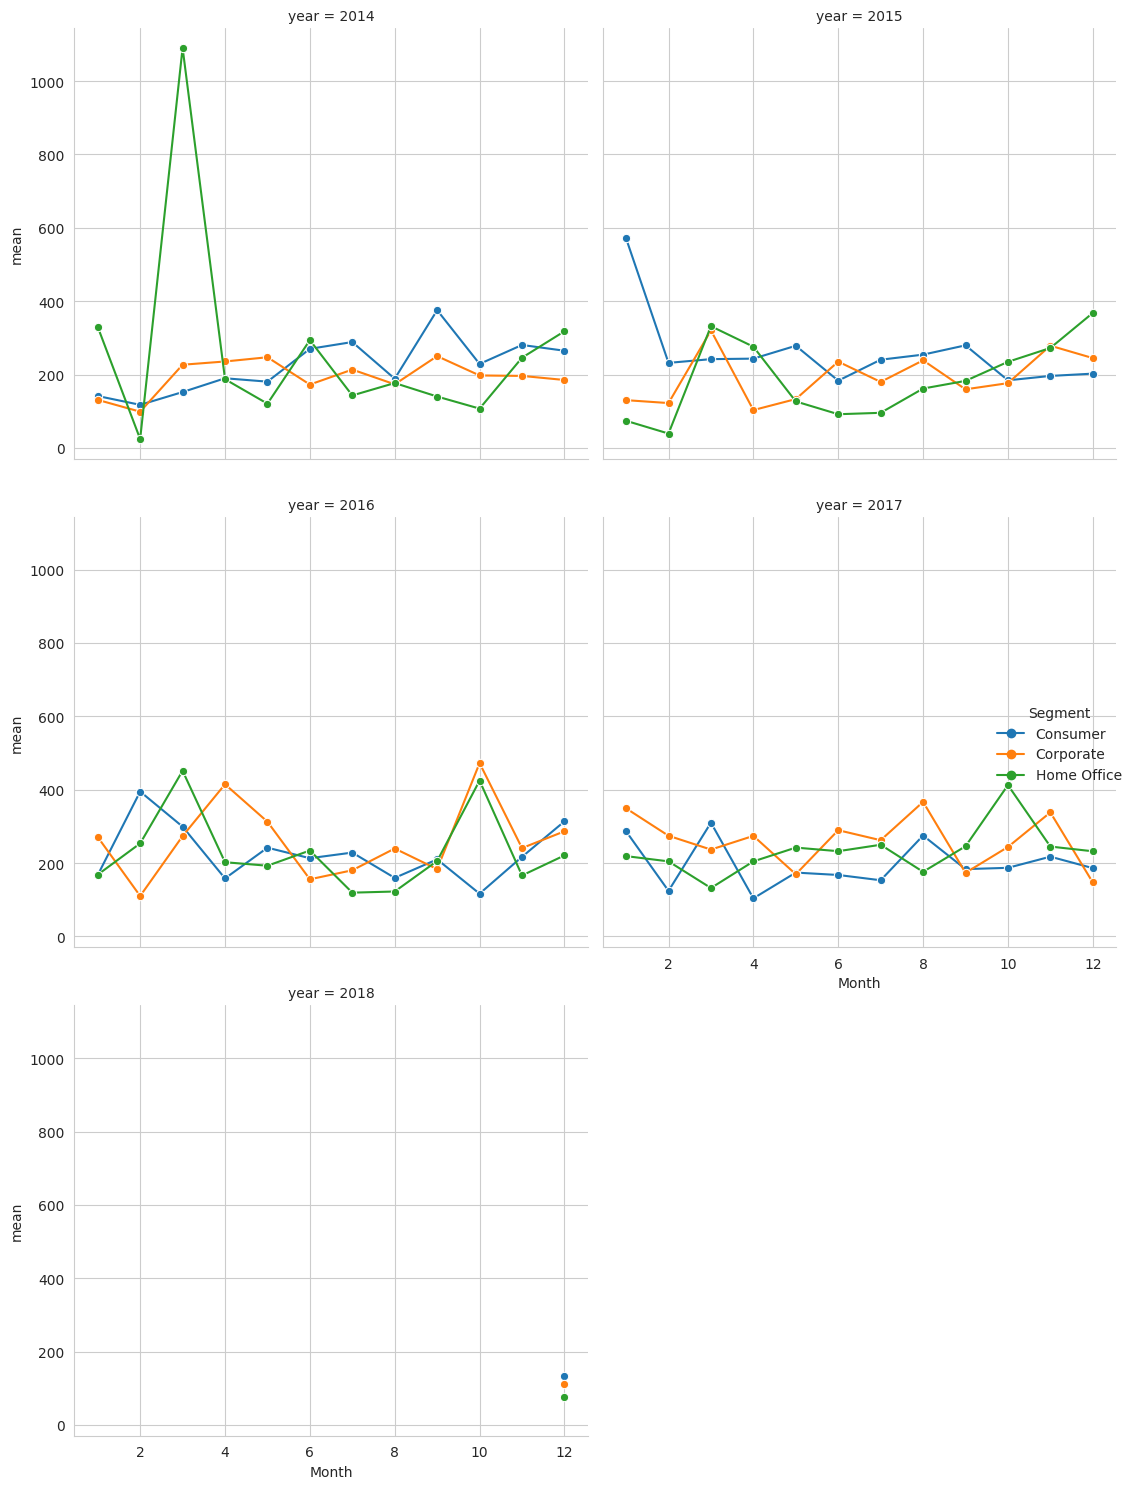

In [143]:
plt.figure(figsize=(12, 6))

fig1 = sns.relplot(kind='line',
            data=media_segmento_temporal.reset_index(),
            y='mean',
            x='Month',
            hue='Segment',
            col='year', col_wrap=2, marker='o')

plt.tight_layout()
plt.show()

O ano de 2018 só posui dados de dezembro.

### 🧩 10. Qual o Total de Vendas Por Categoria e SubCategoria (Top 12 Subcategorias)?

In [249]:
top_vendas_por_categoria = df.groupby(['Category',
                                       'Sub-Category']).sum(numeric_only=True).sort_values(by='Sales',ascending=False).head(12)


In [250]:
top_vendas_por_categoria = top_vendas_por_categoria[['Sales']].astype(float).sort_values(by='Category').reset_index()
top_vendas_por_categoria

,Category,Sub-Category,Sales
0,Furniture,Chairs,328449.1030
1,Furniture,Tables,206965.5320
2,Furniture,Bookcases,114879.9963
3,Furniture,Furnishings,91705.1640
4,Office Supplies,Storage,223843.6080
5,Office Supplies,Binders,203412.7330
6,Office Supplies,Appliances,107532.1610
7,Office Supplies,Paper,78479.2060
8,Technology,Phones,330007.0540
9,Technology,Machines,189238.6310


In [251]:
df_cat = top_vendas_por_categoria.groupby('Category').sum(numeric_only=True).reset_index()
df_cat

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,613267.7080
2,Technology,836154.0330


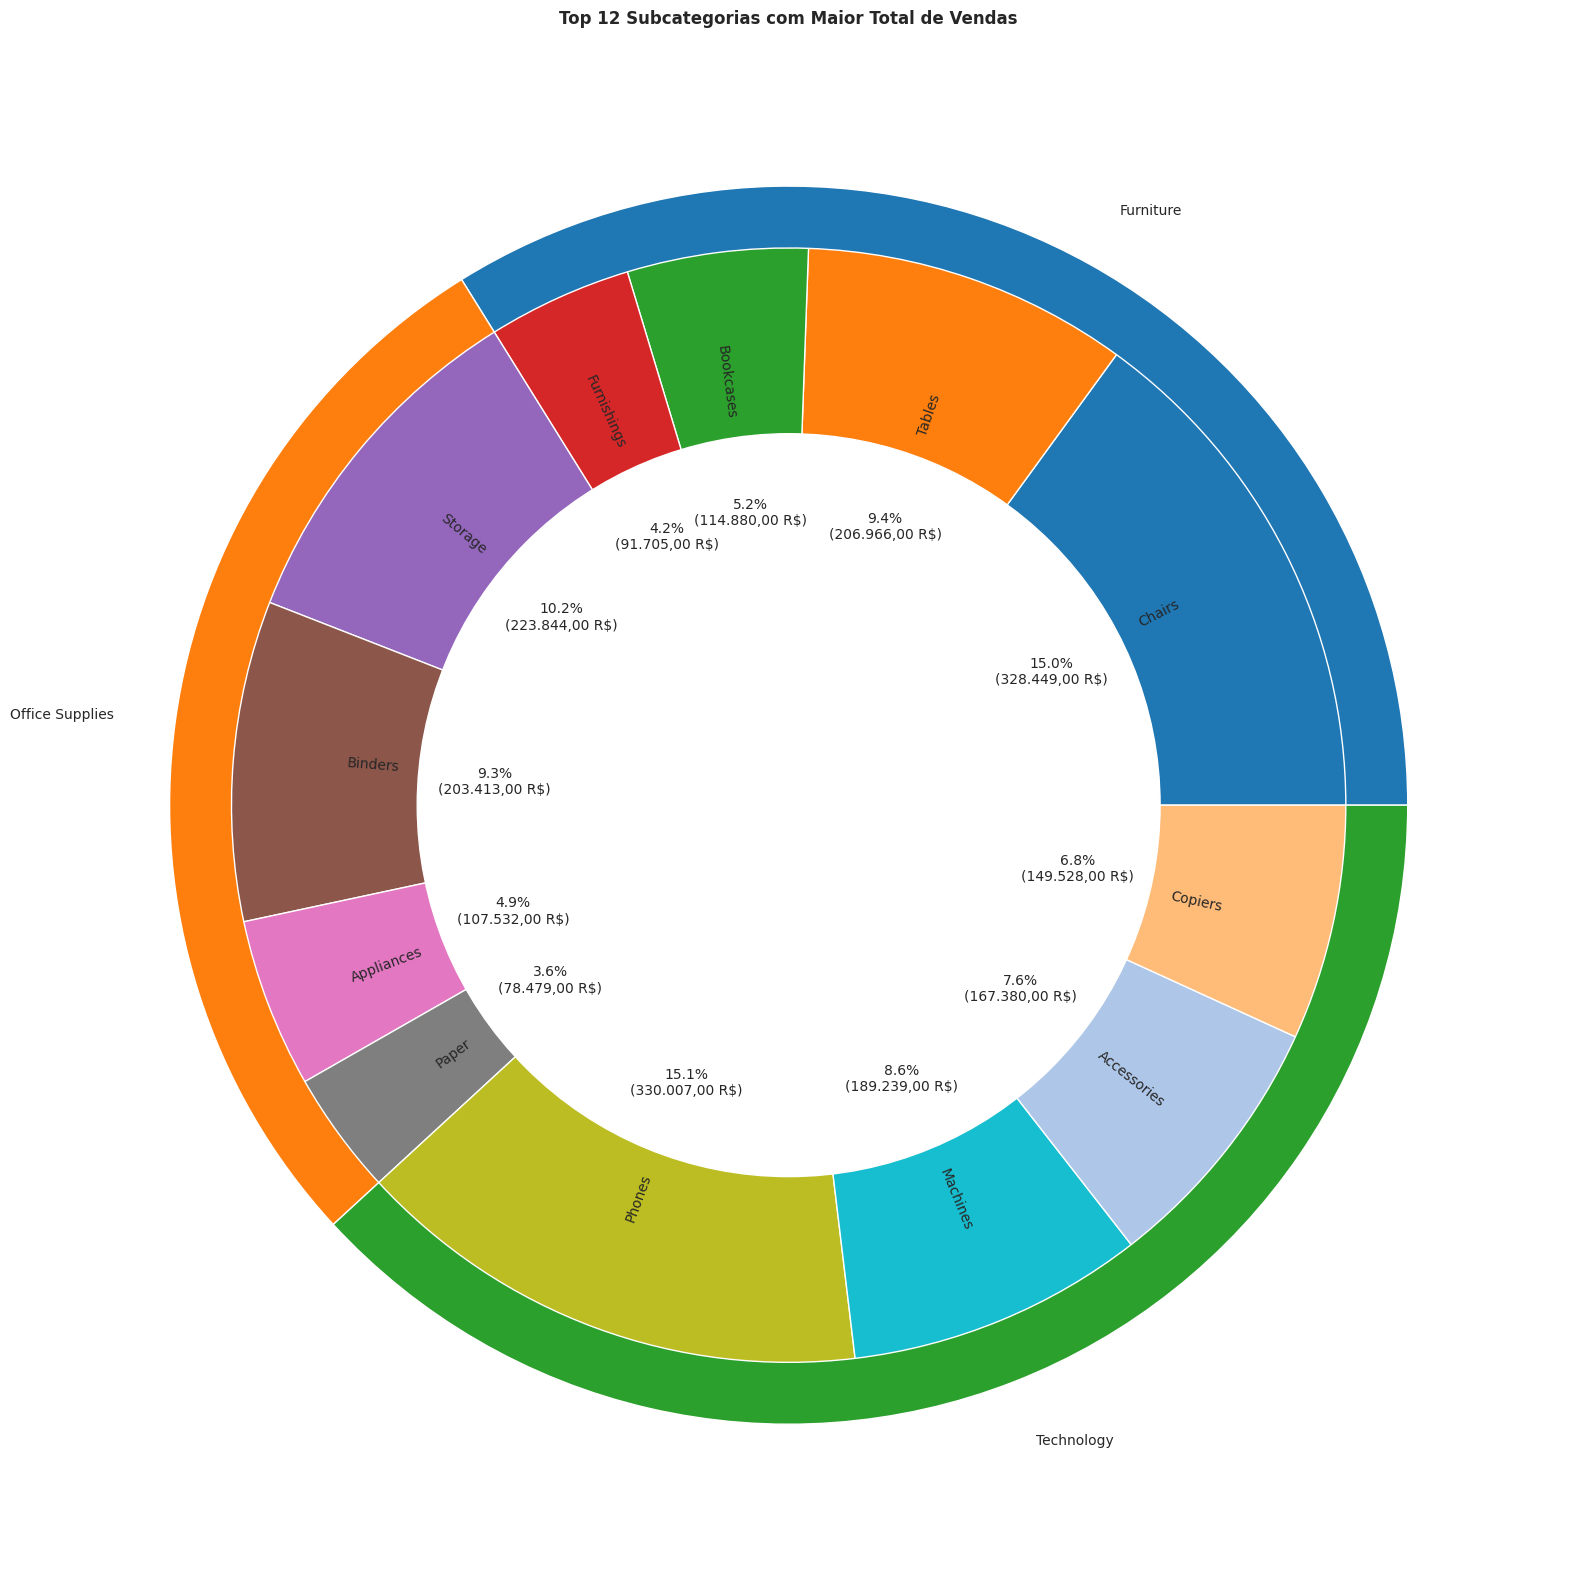

In [259]:
fig, ax = plt.subplots(figsize=(16, 16))

sns.set_style('whitegrid')
sns.set_color_codes("deep")

#Grafico das categorias
graph_1 = ax.pie(df_cat['Sales'],
                 radius=1,
                 labels=df_cat['Category'],
                 wedgeprops=dict(edgecolor = 'white'),
                 colors=['#1f77b4', '#ff7f0e', '#2ca02c'])

cores_subcategorias = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
    '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
    '#bcbd22', '#17becf', '#aec7e8', '#ffbb78']

#Gráficos das subcategorias
graph_2 = ax.pie(top_vendas_por_categoria['Sales'],
                 radius=0.9,
                 labels=top_vendas_por_categoria['Sub-Category'],
                 autopct=lambda pct: func(pct, top_vendas_por_categoria['Sales']),
                 colors=cores_subcategorias,
                 labeldistance=0.7,
                 wedgeprops=dict(edgecolor = 'white'),
                 pctdistance=0.53,
                 rotatelabels=True)

#Limpar o circulo central
centre_circle = plt.Circle((0,0),0.6,fc='white')
fig.gca().add_artist(centre_circle)

ax.set_title('Top 12 Subcategorias com Maior Total de Vendas').set_fontweight('bold')

plt.tight_layout()
plt.show()

## 📈 Resultados e Insights

O projeto identifica tendências de crescimento nas vendas por segmento e apresenta insights valiosos para definição de estratégias comerciais, como:

- Segmento **Consumer** lidera em vendas totais.
- Estados e cidades com maior concentração de vendas.
- Impacto da política de desconto simulada.
- Subcategorias com maior relevância no faturamento.
---
## 🧠 Conclusão

<p>Este projeto demonstra a importância da análise de dados para responder perguntas estratégicas no varejo. A combinação de Python com bibliotecas de visualização permite a extração de insights úteis para melhorar o desempenho e a gestão de negócios.</p>
---

##### 📌 **Autor**

Desenvolvido por **Erivelton Junior**  
[LinkedIn](https://www.linkedin.com/in/eriveltonjr/) | [Portfólio](https://github.com/erivelton-jr)